In [1]:
import matplotlib.pyplot as plt
import pandas as pd # and of course Pandas
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
#read file with orbital solutions
# taken from: http://vo.imcce.fr/insola/earth/online/earth/online/index.php
#A&A 428, 261-285 (2004), DOI: 10.1051/0004-6361:20041335
#Laskar, J., Robutel, P., Joutel, F., Gastineau, M., Correia, A.C.M., Levrard, B. : 2004,
#A long term numerical solution for the insolation quantities of the Earth.

laskar2004 = pd.read_csv('laskar2004-100Ma_65N_july_insol', delimiter= '\s+', header=None)
laskar2004.columns = ["Age(Myr)", "eccentricity", 'precession', "obliquity", "65N july insola"]
laskar2004["Age(Myr)"] = -0.001*laskar2004["Age(Myr)"]


In [3]:
laskar2004.head()

,Age(Myr),eccentricity,precession,obliquity,65N july insola
0,100.000,0.025067,0.025026,0.407037,458.862548
1,99.999,0.025403,0.023597,0.407379,457.461756
2,99.998,0.025716,0.019669,0.407615,457.555120
3,99.997,0.026040,0.013689,0.407742,459.007579
4,99.996,0.026288,0.006020,0.407753,461.823106


In [4]:
#read file with age of chrons
file = "gpts1995-2020.xlsx"
xls = pd.ExcelFile(file)
datafile = xls.parse(0) #first sheet (0) of the excel file parsed to variable
datafile

,Magnetochron-base,epoch,CK1995,GTS2004,GTS2012,GTS2016,GTS2020,Sources of calibration used in GTS2020
0,NaN,NaN,0.00,0.000,0.000,0.000,0.000,NaN
1,C1n,(Brunhes),0.78,0.781,0.781,0.773,0.773,no change from GTS2016
2,C1r.1r,(Matuyama),0.99,0.988,0.988,1.008,1.008,NaN
3,C1r.1n,(Jaramillo),1.07,1.072,1.072,1.076,1.076,NaN
4,C1r.2r,NaN,NaN,1.173,1.173,1.189,1.189,NaN
...,...,...,...,...,...,...,...,...
184,C32r.1r,NaN,NaN,NaN,NaN,NaN,73.951,NaN
185,C32r.1n,NaN,NaN,NaN,NaN,NaN,74.051,NaN
186,C32r.2r,NaN,NaN,NaN,NaN,NaN,74.201,NaN
187,C33n,NaN,NaN,NaN,NaN,NaN,79.900,NaN


In [5]:
#read file with age of stages and epochs
file = "gpts1995-2020.xlsx"
xls = pd.ExcelFile(file)
chronostrat = xls.parse(1) #first sheet (0) of the excel file parsed to variable
chronostrat

,Period,Age,Stage,GTS2020 (Ma)
0,-,-,-,0.000
1,NaN,Holocene,NaN,0.118
2,NaN,NaN,Tarantian,0.130
3,NaN,NaN,Chibanian,0.773
4,NaN,NaN,Calabrian,1.800
5,Quaternary,Pleistocene,Gelasian,2.580
6,NaN,NaN,Piacenzian,3.600
7,NaN,Pliocene,Zanclean,5.340
8,NaN,NaN,Messinian,7.246
9,NaN,NaN,Tortonian,11.630


In [6]:
chrono_age = chronostrat.dropna(subset=['Age'])
chrono_age = chrono_age.reset_index(drop = True)
chrono_age[['Age','GTS2020 (Ma)']]

,Age,GTS2020 (Ma)
0,-,0.000
1,Holocene,0.118
2,Pleistocene,2.580
3,Pliocene,5.340
4,Miocene,23.040
5,Oligocene,33.900
6,Eocene,56.000
7,Paleocene,66.040


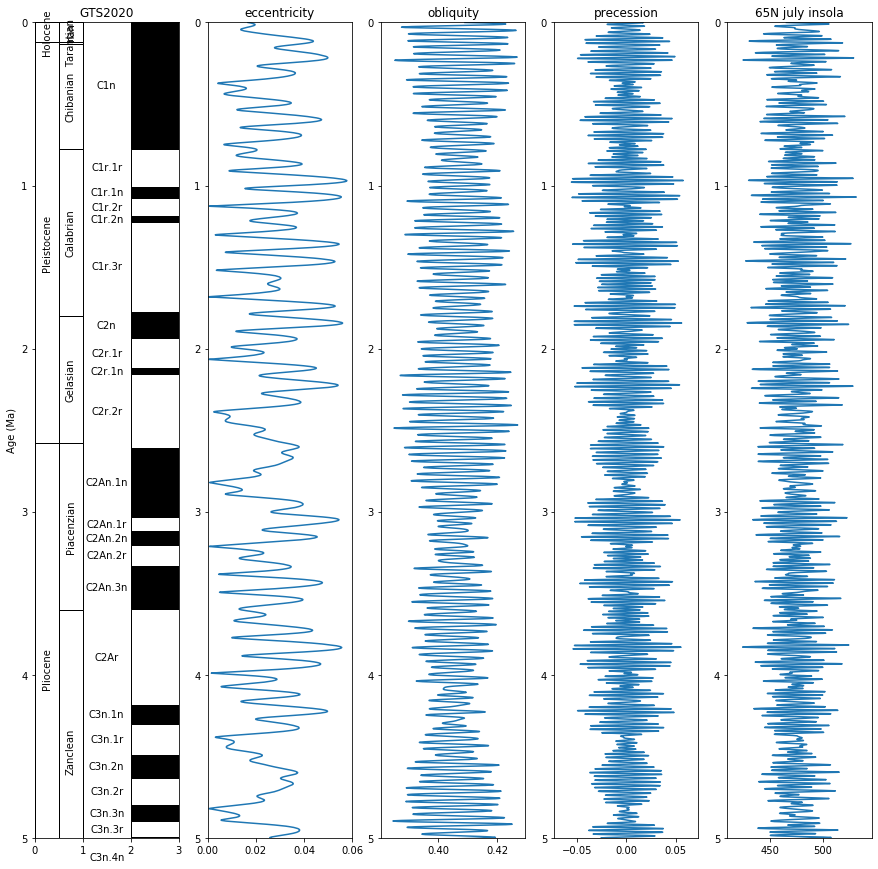

In [7]:
#select age range to plot
minAge = 0
maxAge = 5

fig = plt.subplots(figsize=(15, 15))

ax1 = plt.subplot(1,5,1)
#drawing polarity column
width = 1
for value in range(len(datafile[datafile['GTS2020']<=minAge]),1+len(datafile[datafile['GTS2020']<maxAge])):
    bottom_left = (2,datafile.loc[value-1,'GTS2020'])
    height = datafile.loc[value,'GTS2020']-datafile.loc[value-1,'GTS2020']
    midpoint_height = (datafile.loc[value,'GTS2020']+datafile.loc[value-1,'GTS2020'])/2
    polarity = datafile.loc[value,'Magnetochron-base'][-1:]
    if polarity == 'n':
        fill = 'black'
    else:
        fill = 'white'
    ax1.add_patch(Rectangle(bottom_left, width, height, angle=0.0, facecolor =fill, edgecolor = 'black'))
    ax1.text(1.5, midpoint_height, datafile.loc[value,'Magnetochron-base'], horizontalalignment='center', verticalalignment='center',
         rotation='0')
#drawing stage column
width = 0.5
for value in range(len(chronostrat[chronostrat['GTS2020 (Ma)']<=minAge]),1+len(chronostrat[chronostrat['GTS2020 (Ma)']<maxAge])):
    bottom_left = (0.5,chronostrat.loc[value-1,'GTS2020 (Ma)'])
    height = chronostrat.loc[value,'GTS2020 (Ma)']-chronostrat.loc[value-1,'GTS2020 (Ma)']
    midpoint_height = (chronostrat.loc[value,'GTS2020 (Ma)']+chronostrat.loc[value-1,'GTS2020 (Ma)'])/2
    ax1.add_patch(Rectangle(bottom_left, width, height, angle=0.0, facecolor ='white', edgecolor = 'black'))
    ax1.text(0.75, midpoint_height, chronostrat.loc[value,'Stage'], horizontalalignment='center', verticalalignment='center',
         rotation='90')
# drawing Age column    
width = 0.5
for value in range(len(chrono_age[chrono_age['GTS2020 (Ma)']<=minAge]),1+len(chrono_age[chrono_age['GTS2020 (Ma)']<maxAge])):
    bottom_left = (0,chrono_age.loc[value-1,'GTS2020 (Ma)'])
    height = chrono_age.loc[value,'GTS2020 (Ma)']-chrono_age.loc[value-1,'GTS2020 (Ma)']
    midpoint_height = (chrono_age.loc[value,'GTS2020 (Ma)']+chrono_age.loc[value-1,'GTS2020 (Ma)'])/2
    ax1.add_patch(Rectangle(bottom_left, width, height, angle=0.0, facecolor ='white', edgecolor = 'black'))
    ax1.text(0.25, midpoint_height, chrono_age.loc[value,'Age'], horizontalalignment='center', verticalalignment='center',
         rotation='90')
#plt.xlabel("X-AXIS")
plt.title("GTS2020")
plt.ylabel("Age (Ma)")
plt.xlim(left = 0, right = 3)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1),np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()

ax2 = plt.subplot(1,5,2)
age = laskar2004['Age(Myr)']
eccentricity = laskar2004['eccentricity']
plt.plot(eccentricity, age)
plt.title("eccentricity")
plt.xlim(left = 0, right = 0.06)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()

ax3 = plt.subplot(1,5,3)
age = laskar2004['Age(Myr)']
eccentricity = laskar2004['obliquity']
plt.plot(eccentricity, age)
plt.title("obliquity")
#plt.xlim(left = 0, right = 0.06)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()

ax4 = plt.subplot(1,5,4)
age = laskar2004['Age(Myr)']
eccentricity = laskar2004['precession']
plt.plot(eccentricity, age)
plt.title("precession")
#plt.xlim(left = 0, right = 0.06)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()

ax5 = plt.subplot(1,5,5)
age = laskar2004['Age(Myr)']
eccentricity = laskar2004['65N july insola']
plt.plot(eccentricity, age)
plt.title("65N july insola")
#plt.xlim(left = 0, right = 0.06)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()



# saving plot to file
plt.savefig('GTS'+str(minAge)+'-'+str(maxAge)+'Ma.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='pdf', transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

plt.show()